In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
dataset = pd.read_excel('data testing.xlsx')
dataset.head(24)

,NAMA,Umur,Kelamin,Gaji,Tahun Mulai Bekerja,Jumlah Anak
0,Reza,22,L,2400000,2021,1
1,Vicky,24,L,3000000,2023,2
2,Abid,22,L,3000000,2021,1
3,Rafly,21,L,5000000,2021,1
4,Iqbal,24,L,2400000,2021,1
5,Hafid,20,L,5000000,2021,2
6,Putri,20,P,5000000,2023,1
7,Koko,28,L,3000000,2023,1
8,Jaya,22,L,2400000,2021,1
9,Bella,23,P,5000000,2021,2


In [12]:
x = dataset.iloc [:, [1,3]].values
y = dataset.iloc [:, -1 ].values
print(x)
print(y)

[[     22 2400000]
 [     24 3000000]
 [     22 3000000]
 [     21 5000000]
 [     24 2400000]
 [     20 5000000]
 [     20 5000000]
 [     28 3000000]
 [     22 2400000]
 [     23 5000000]
 [     20 3000000]
 [     25 3000000]
 [     27 2400000]
 [     27 3000000]
 [     28 3000000]
 [     23 2400000]
 [     21 3000000]
 [     21 2400000]
 [     21 5000000]
 [     22 6700000]
 [     24 3000000]
 [     29 6700000]
 [     29 3000000]
 [     27 2400000]]
[1 2 1 1 1 2 1 1 1 2 1 4 3 2 2 2 2 4 4 1 1 2 1 4]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train)
len(x_train)
len(x)
len(x_test)
len(y)
len(y_test)
len(y_train)

[[     27 3000000]
 [     27 2400000]
 [     21 3000000]
 [     22 2400000]
 [     20 5000000]
 [     21 2400000]
 [     24 2400000]
 [     22 3000000]
 [     20 5000000]
 [     21 5000000]
 [     23 5000000]
 [     28 3000000]
 [     22 6700000]
 [     21 5000000]
 [     22 2400000]
 [     29 6700000]
 [     23 2400000]
 [     27 2400000]]


18

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 1.28745262 -0.49058769]
 [ 1.28745262 -0.89197762]
 [-0.81928803 -0.49058769]
 [-0.46816459 -0.89197762]
 [-1.17041147  0.84737874]
 [-0.81928803 -0.89197762]
 [ 0.23408229 -0.89197762]
 [-0.46816459 -0.49058769]
 [-1.17041147  0.84737874]
 [-0.81928803  0.84737874]
 [-0.11704115  0.84737874]
 [ 1.63857606 -0.49058769]
 [-0.46816459  1.9846502 ]
 [-0.81928803  0.84737874]
 [-0.46816459 -0.89197762]
 [ 1.9896995   1.9846502 ]
 [-0.11704115 -0.89197762]
 [ 1.28745262 -0.89197762]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0 0]
 [2 0 0]
 [0 1 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

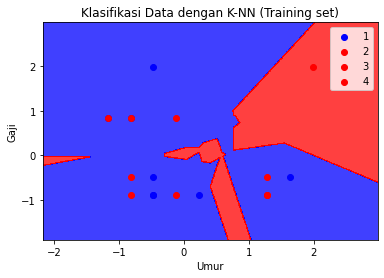

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                        np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


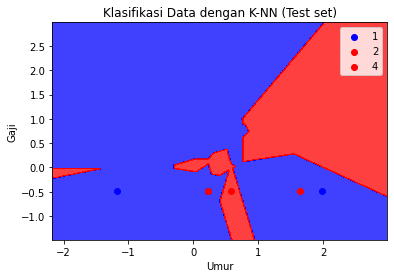

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue','red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()